In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('TaxiFare.csv')
df.shape

(50000, 8)

In [3]:
df.head(2)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


In [4]:
df.columns = ['id','amount','datetime','lon_pickup','lat_pickup',
              'lon_drop','lat_drop','passcount']
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.isnull().sum()

id            0
amount        0
datetime      0
lon_pickup    0
lat_pickup    0
lon_drop      0
lat_drop      0
passcount     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

id             object
amount        float64
datetime       object
lon_pickup    float64
lat_pickup    float64
lon_drop      float64
lat_drop      float64
passcount       int64
dtype: object

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df.dtypes

id                         object
amount                    float64
datetime      datetime64[ns, UTC]
lon_pickup                float64
lat_pickup                float64
lon_drop                  float64
lat_drop                  float64
passcount                   int64
dtype: object

#### Feature Engineering

In [10]:
df['Yr'] = df['datetime'].dt.year
df['Qtr'] = df['datetime'].dt.quarter
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour
df['DayofWeek'] = df['datetime'].dt.weekday
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1


In [11]:
df['DayofWeek'].value_counts()

DayofWeek
4    7668
5    7630
3    7406
2    7212
1    6927
0    6639
6    6518
Name: count, dtype: int64

In [12]:
# Weekend = 1, Weekday = 0
df['IsWeekend'] = np.where(df['DayofWeek'].isin([5,6]),1,0)

In [13]:
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,0


In [14]:
df['Hour'].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5])

In [15]:
def compute_hr_qtr(x):
    if x>0 and x<=6:   # Night
        return 1
    elif x>6 and x<=12 : # Morning
        return 2
    elif x>12 and x<=18: # Afternoon
        return 3
    else:
        return 4       # Evening

In [16]:
df['Hr_Qtr'] = df['Hour'].apply(compute_hr_qtr)

In [17]:
df['Hr_Qtr'].value_counts(dropna=False)

Hr_Qtr
4    15959
3    14913
2    13574
1     5554
Name: count, dtype: int64

In [18]:
df['Hr_Qtr1'] = pd.cut(df['Hour'],bins=[0,6,12,18,23],labels=[1,2,3,4])
df['Hr_Qtr1'].value_counts(dropna=False)

Hr_Qtr1
3      14913
4      14069
2      13574
1       5554
NaN     1890
Name: count, dtype: int64

In [19]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'passcount', 'Yr', 'Qtr', 'Month', 'Day', 'Hour',
       'DayofWeek', 'IsWeekend', 'Hr_Qtr', 'Hr_Qtr1'],
      dtype='object')

In [20]:
# from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [21]:
# print(df['datetime'].min(),df['datetime'].max())

In [22]:
# cal = calendar()
# holidays = cal.holidays(start=df['datetime'].min(), end=df['datetime'].max())

# df['Holiday'] = df['datetime'].isin(holidays)
# df['Holiday'].value_counts()

#### Check data consistency

In [23]:
df.describe()

,amount,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,2011.739260,2.422800,6.273300,15.672040,13.489080,3.029980,0.282960,2.825540
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,1.862639,1.121528,3.461157,8.660789,6.506935,1.956936,0.450442,1.002279
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,2010.000000,1.000000,3.000000,8.000000,9.000000,1.000000,0.000000,2.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,2012.000000,2.000000,6.000000,16.000000,14.000000,3.000000,0.000000,3.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,2013.000000,3.000000,9.000000,23.000000,19.000000,5.000000,1.000000,4.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,4.000000


In [24]:
print(df[df['amount']<=0].shape)
print(df[df['passcount']==0].shape)

(9, 17)
(165, 17)


In [25]:
df1 = df.copy()

In [26]:
df = df[df['amount']>0]
print(df.shape)

(49991, 17)


In [27]:
df = df[df['passcount']!=0]
df.shape

(49826, 17)

#### Note
1) Latitude ranges from -90 to 90<br>
2) Logitude ranges from -180 to 180<br>

In [28]:
print(df[(df['lat_pickup']<=-90) | (df['lat_pickup']>90)].shape)
print(df[(df['lat_drop']<=-90) | (df['lat_drop']>90)].shape)

(1, 17)
(0, 17)


In [29]:
print(df[(df['lon_pickup']<=-180) | (df['lon_pickup']>180)].shape)
print(df[(df['lon_drop']<=-180) | (df['lon_drop']>180)].shape)

(0, 17)
(0, 17)


In [30]:
df[(df['lat_pickup']<=-90) | (df['lat_pickup']>90)]

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr,Hr_Qtr1
5686,15:00.0,3.3,2011-07-30 11:15:00+00:00,-73.947235,401.083332,-73.951392,40.778927,1,2011,3,7,30,11,5,1,2,2


In [31]:
df = df[(df['lat_pickup']>=-90) & (df['lat_pickup']<=90)]
df.shape

(49825, 17)

In [32]:
#### Taxi Fare => Distance + PassCount, CarType, Day, Time,

#### Distance Metrics
A(x1,y1), B(x2,y2)
<pre>
1) Minkowski Distance(A,B) = ((|x2-x1|)^p + (|y2-y1|)^p) ^(1/p), p is an int

If p = 2
2) Euclidean Distance(A,B) = sqrt((x2-x1)^2 + (y2-y1)^2))
If p = 1
3) Manhattan Distance(A,B) = (|x2-x1|) + (|y2-y1|)
</pre>

In [33]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'passcount', 'Yr', 'Qtr', 'Month', 'Day', 'Hour',
       'DayofWeek', 'IsWeekend', 'Hr_Qtr', 'Hr_Qtr1'],
      dtype='object')

In [34]:
def minkowski_dist(x1,x2,y1,y2,p):
    dist  = ((abs(x2-x1))**p + (abs(y2-y1))**p)**(1/p)
    return dist

In [35]:
df['Euclidean_Dist'] = minkowski_dist(df['lat_pickup'],df['lat_drop'],
                                     df['lon_pickup'],df['lon_drop'],2)

df['Manhattan_Dist'] = minkowski_dist(df['lat_pickup'],df['lat_drop'],
                                     df['lon_pickup'],df['lon_drop'],1)

### Haversine Distance

In [36]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [37]:
def generate_haversine():
    hav_dis = []
    for i in range(len(df)):
        lat_pair_r = [radians(df['lat_pickup'].iloc[i]),
                    radians(df['lon_pickup'].iloc[i])]
        lon_pair_r = [radians(df['lat_drop'].iloc[i]),
                    radians(df['lon_drop'].iloc[i])]
        res = (haversine_distances([lat_pair_r, lon_pair_r])*6371)[0][1]
        # radius of earth = 6371 kms
        hav_dis.append(res)
    return hav_dis

In [38]:
df['Haversine_Dist'] = generate_haversine()

In [39]:
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr,Hr_Qtr1,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,0,3,3,0.009436,0.011742,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,0,3,3,0.079696,0.107481,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,0,4,NaN,0.013674,0.019212,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,1,1,1,0.025340,0.029386,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,0,2,2,0.019470,0.027194,1.999157


In [40]:
# !pip install folium

In [41]:
import folium
from folium import Marker

In [42]:
# Map([lat,long])
map1 = folium.Map([40.721319,-73.844311],tiles='openstreetmap')
map1

In [43]:
samp = df.sample(50)
samp.shape

(50, 20)

In [44]:
# df.columns

In [45]:
lat1 = samp['lat_pickup']
lon1 = samp['lon_pickup']
lat2 = samp['lat_drop']
lon2 = samp['lon_drop']

#### Pickup Locations

In [46]:
for i,j in zip(lat1,lon1):
    folium.Marker(location=[i,j],tooltip=f"{str(i)} {str(j)}",
                  icon=folium.Icon(color='red')).add_to(map1)
    
map1

#### Drop Location

In [47]:
for i,j in zip(lat2,lon2):
    folium.Marker(location=[i,j],tooltip=f"{str(i)} {str(j)}",
                  icon=folium.Icon(color='black')).add_to(map1)
    
map1

In [48]:
# pickup -> drop
# (lat1,lon1) -> (lat2,lon2)

In [49]:
data = []
for lt1,ln1,lt2,ln2 in zip(lat1,lon1,lat2,lon2):
    data.append([[lt1,ln1],[lt2,ln2]])
data

[[[40.725855, -73.994682], [40.722952, -73.988762]],
 [[0.0, 0.0], [0.0, 0.0]],
 [[40.765048, -73.976474], [40.762986, -73.964665]],
 [[40.70767, -74.00703], [40.769487, -73.880707]],
 [[40.769687, -73.987923], [40.733163, -73.98265]],
 [[40.756552, -73.978754], [40.743871, -73.990893]],
 [[0.0, 0.0], [40.79654312, -73.93659973]],
 [[40.738107, -74.000917], [40.735775, -74.00067]],
 [[40.739417, -74.006623], [40.757693, -73.91453]],
 [[40.754601, -73.977866], [40.767387, -73.968722]],
 [[40.756573, -73.9209], [40.70534, -73.815065]],
 [[40.777124, -73.963661], [40.770343, -73.968492]],
 [[40.725919, -73.983732], [40.715967, -73.986882]],
 [[40.733678, -74.006306], [40.74649, -73.990269]],
 [[40.713259, -74.003946], [40.784177, -73.976554]],
 [[40.739991, -73.994782], [40.758751, -73.982627]],
 [[40.743862, -73.981617], [40.745492, -73.946232]],
 [[40.768155, -73.983292], [40.774236, -73.97737]],
 [[40.734572, -73.990113], [40.722652, -73.977292]],
 [[40.76506, -73.97902], [40.768216, -

In [50]:
print(lat1.iloc[0],lon1.iloc[0])
print(lat2.iloc[0],lon2.iloc[0])

40.725855 -73.994682
40.722952 -73.988762


In [51]:

line_coordinates = [
    [40.750242, -73.991332], 
    [40.77996, -73.957297]
]

line = folium.PolyLine(locations=line_coordinates, color='blue', weight=3, opacity=0.8)

line.add_to(map1)

map1

In [52]:
# for i,j in data:
#     print([i,j])

In [53]:
for i,j in data:
    line = folium.PolyLine(locations=[i,j], color='blue', weight=3, opacity=0.8)
    line.add_to(map1)

map1

In [54]:
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr,Hr_Qtr1,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,0,3,3,0.009436,0.011742,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,0,3,3,0.079696,0.107481,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,0,4,NaN,0.013674,0.019212,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,1,1,1,0.025340,0.029386,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,0,2,2,0.019470,0.027194,1.999157


In [55]:
df.describe()  # amount, passcount, lat,lon

,amount,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
count,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,11.373212,-72.510557,39.926937,-72.506896,39.927448,1.673437,2011.740151,2.423663,6.275946,15.671631,13.487807,3.029945,0.283051,2.825730,0.176089,0.231213,17.693890
std,9.693602,10.391455,6.011390,10.400148,6.011808,1.287799,1.865203,1.121367,3.460644,8.660797,6.508598,1.957200,0.450485,1.002384,3.407818,4.535125,345.498637
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000,2010.000000,1.000000,3.000000,8.000000,9.000000,1.000000,0.000000,2.000000,0.012471,0.015917,1.222822
50%,8.500000,-73.981838,40.752685,-73.980087,40.753375,1.000000,2012.000000,2.000000,6.000000,16.000000,14.000000,3.000000,0.000000,3.000000,0.021502,0.027637,2.120017
75%,12.500000,-73.967145,40.767363,-73.963620,40.768162,2.000000,2013.000000,3.000000,9.000000,23.000000,19.000000,5.000000,1.000000,4.000000,0.038676,0.050872,3.896168
max,200.000000,40.783472,43.098708,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,4.000000,84.480944,114.767235,8667.818812


#### Distance should not be 0 

Reasons
1) Same pickup and drop locations = Round trip rides

In [56]:
print(df[df['Euclidean_Dist']==0].shape)
print(df[df['Manhattan_Dist']==0].shape)
print(df[df['Haversine_Dist']==0].shape)

(1446, 20)
(1446, 20)
(1446, 20)


#### Records where pickup location is same as drop location

In [57]:
round_trip = df[(df['lat_pickup']==df['lat_drop']) & (df['lon_pickup']==df['lon_drop'])]
round_trip.shape

(1446, 20)

In [58]:
df.shape

(49825, 20)

In [59]:
df.shape

(49825, 20)

In [60]:
df2 = df.copy()

In [61]:
49825 - 1446

48379

In [62]:
df2 = df2[(df2['Euclidean_Dist']>0) | (df2['Manhattan_Dist']>0) | (df2['Haversine_Dist']>0)]
df2.shape

(48379, 20)

### EDA

In [63]:
df2.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'passcount', 'Yr', 'Qtr', 'Month', 'Day', 'Hour',
       'DayofWeek', 'IsWeekend', 'Hr_Qtr', 'Hr_Qtr1', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist'],
      dtype='object')

In [64]:
cat_cols = ['passcount','Yr', 'Qtr', 'Month', 'Day', 'Hour',
            'DayofWeek', 'IsWeekend', 'Hr_Qtr']
num_cols = ['amount','Euclidean_Dist','Manhattan_Dist', 'Haversine_Dist']

#### Univariate - Cat cols

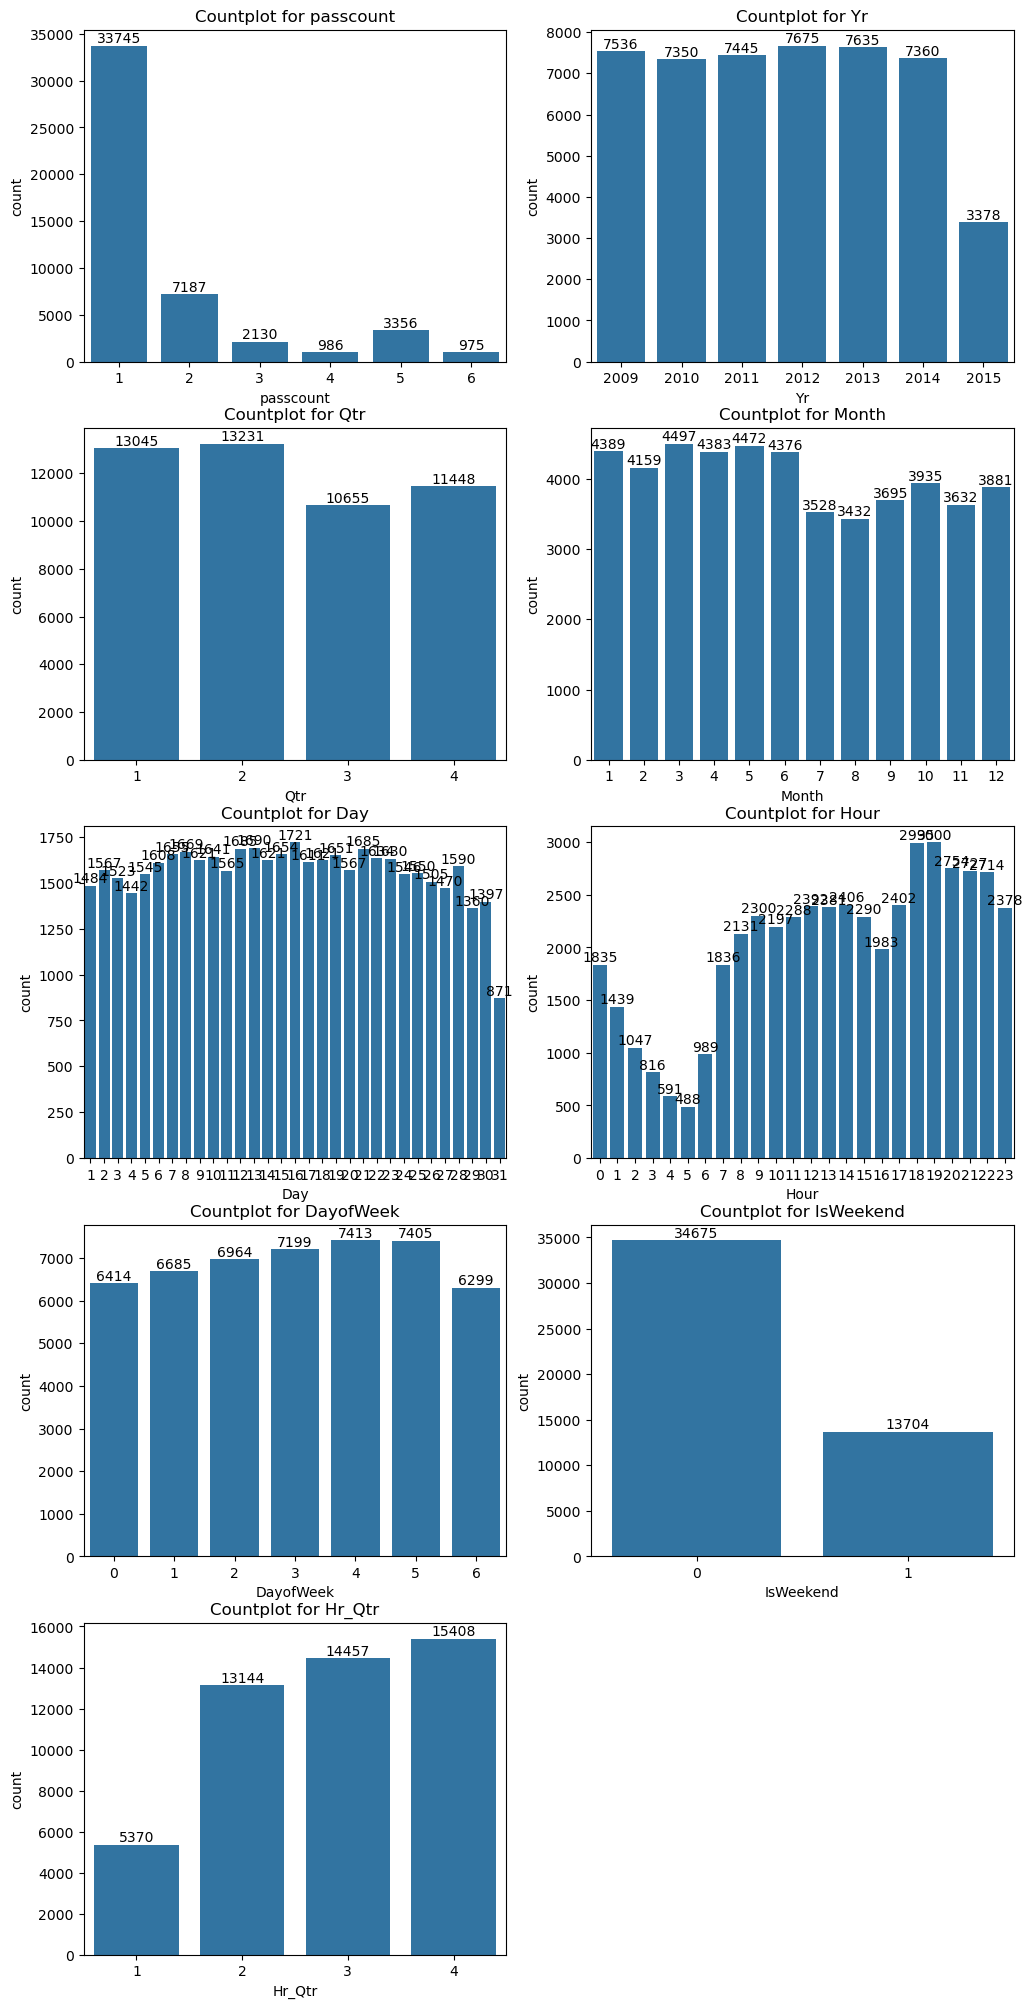

In [65]:
plt.figure(figsize=(12,25))
for i in range(len(cat_cols)):
    plt.subplot(5,2,i+1)
    ax = sns.countplot(x=df2[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

AttributeError: 'Axes' object has no attribute 'kdep_label'

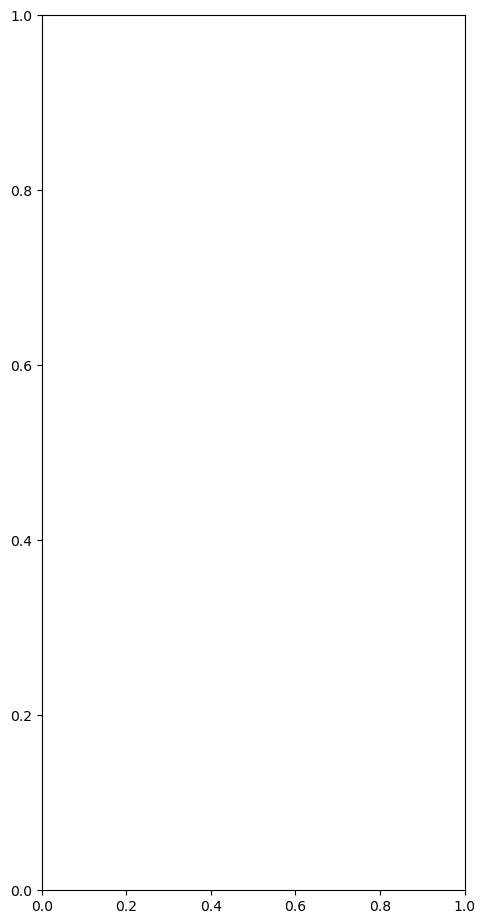

In [66]:
plt.figure(figsize=(12,25))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)    
    ax.kdep_label(ax.containers[0])
    plt.title(f'KDEPplot for {num_cols[i]}')
plt.show()

In [ ]:
cols = ['Qtr','Month','Hour','Dayofweek']

plt.figure(figsize = (12,15))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    ax = sns.barplot()

In [67]:
df.describe()

,amount,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
count,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,11.373212,-72.510557,39.926937,-72.506896,39.927448,1.673437,2011.740151,2.423663,6.275946,15.671631,13.487807,3.029945,0.283051,2.825730,0.176089,0.231213,17.693890
std,9.693602,10.391455,6.011390,10.400148,6.011808,1.287799,1.865203,1.121367,3.460644,8.660797,6.508598,1.957200,0.450485,1.002384,3.407818,4.535125,345.498637
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000,2010.000000,1.000000,3.000000,8.000000,9.000000,1.000000,0.000000,2.000000,0.012471,0.015917,1.222822
50%,8.500000,-73.981838,40.752685,-73.980087,40.753375,1.000000,2012.000000,2.000000,6.000000,16.000000,14.000000,3.000000,0.000000,3.000000,0.021502,0.027637,2.120017
75%,12.500000,-73.967145,40.767363,-73.963620,40.768162,2.000000,2013.000000,3.000000,9.000000,23.000000,19.000000,5.000000,1.000000,4.000000,0.038676,0.050872,3.896168
max,200.000000,40.783472,43.098708,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,4.000000,84.480944,114.767235,8667.818812
